In [1]:
#Danışmansız Öğrenme (Unsupervised Learning)
"""
1- Centroid based clustering (kümeleme) : K-means
2- Hierarchical clustering : Agglomerative/Divisive
3- Density models : DBSCAN, OPTICS
Nerelerde kullanılır? Sahte Haber Tespiti, Spam e-posta filtreleme, Satış-Pazarlama, Network trafiğini 
sınıflandırma, Suç içeren aktivite tespiti, Deprem çalışmaları
"""

'\n1- Centroid based clustering (kümeleme) : K-means\n2- Hierarchical clustering (Agglomerative/Divisive)\n3- Density models (e.g. DBSCAN, OPTICS)\nNerelerde kullanılır? Sahte Haber Tespiti, Spam e-posta filtreleme, Satış-Pazarlama, Network trafiğini \nsınıflandırma, Suç içeren aktivite tespiti, Deprem çalışmaları\n'

In [3]:
#K-means
"""
1- Rastgele K adet merkez ata
2- Bütün noktaların kendi içindeki merkezlere uzaklığını ölç ve noktaları en kısa mesafeye göre kümeye gönder.
3- Within-cluster sum of squared distances (WCSS/Inertia) 'ın en düşük değere sahip olacağı modeli seç.
4- Bütün noktalar kümelere atandıktan sonra iterasyon yoluyla tekrardan küme merkezlerini hesapla 
(centroidleri hesapla)
5- Küme merkezlerinin değişimi durana dek 2, 3 ve 4. adımları tekrarla ve noktalar sabit kalana dek devam et.
"""

"\n1- Rastgele K adet merkez ata\n2- Bütün noktaların kendi içindeki merkezlere uzaklığını ölç ve noktaları en kısa mesafeye göre kümeye gönder.\n3- Within-cluster sum of squared distances (WCSS/Inertia) 'ın en düşük değere sahip olacağı modeli seç.\n4- Bütün noktalar kümelere atandıktan sonra iterasyon yoluyla tekrardan küme merkezlerini hesapla \n(centroidleri hesapla)\n5- Küme merkezlerinin değişimi durana dek 2, 3 ve 4. adımları tekrarla ve noktalar sabit kalana dek devam et.\n"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = dataset.iloc[:, 3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


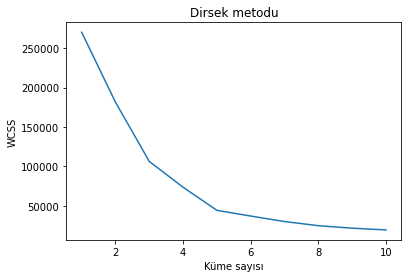

In [8]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Dirsek metodu')
plt.xlabel('Küme sayısı')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [11]:
test = kmeans.predict([[15, #Annual Income (k$)
                        39, #Spending Score (1-100)
                       ]])
print("Bu nokta", test[0], "kümesine aittir")

Bu nokta 2 kümesine aittir


In [12]:
X[y_kmeans == 0].head()

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42


In [13]:
kmeans.cluster_centers_[:, 0]

array([55.2962963 , 88.2       , 26.30434783, 25.72727273, 86.53846154])

In [14]:
kmeans.cluster_centers_[:, 1]

array([49.51851852, 17.11428571, 20.91304348, 79.36363636, 82.12820513])

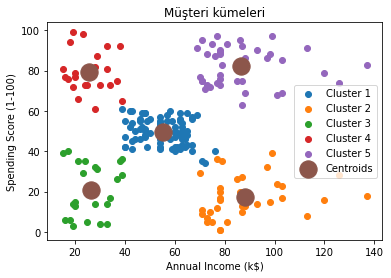

In [15]:
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], [X[y_kmeans == 0]['Spending Score (1-100)']], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], [X[y_kmeans == 1]['Spending Score (1-100)']], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], [X[y_kmeans == 2]['Spending Score (1-100)']], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], [X[y_kmeans == 3]['Spending Score (1-100)']], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], [X[y_kmeans == 4]['Spending Score (1-100)']], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, label = 'Centroids')
plt.title('Müşteri kümeleri')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [16]:
#Hierarchical Clustering

In [17]:
#Agglomerative Clustering -> bottom-up approach (aşağıdan yukarıya yaklaşımı)

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [19]:
customer_data = pd.read_csv('data/Mall_Customers.csv')

In [20]:
customer_data.shape

(200, 5)

In [21]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
data = customer_data.iloc[:, 3:5].values

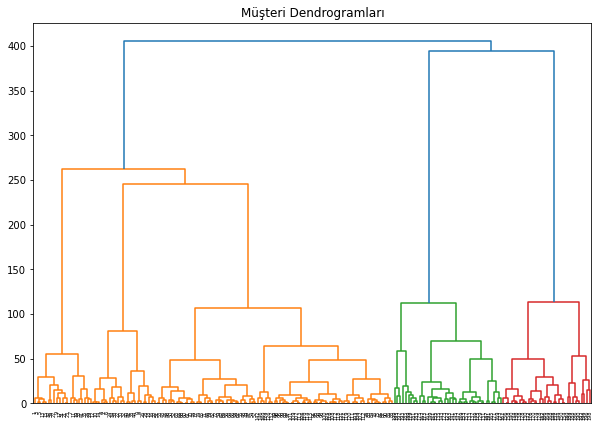

In [24]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))
plt.title("Müşteri Dendrogramları")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

In [25]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

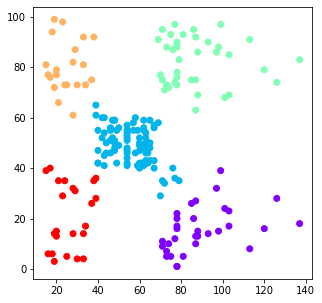

In [26]:
plt.figure(figsize = (5,5))
plt.scatter(data[:, 0], data[:, 1], c = cluster.labels_, cmap = 'rainbow')

In [27]:
"""
Agent (Ajan) : 
1 - İnsan 
2 - Robotik 
3 - Yazılım

Environment (Ortam) :
1 - Ayrık/Sürekli -> Satranç ayrık, otonom sürüş sürekli bir ortamdır 
2 - Gözlemlenebilir / Parçalı Gözlemlenebilir 
3 - Statik/Dinamik -> Agent hareket ederken değişmezse ortam statik, değişirse dinamiktir 
4 - Erişilebilir / Erişilemez -> Sensörlerin tüm durumlara erişebiliyor/erişemiyor olması
5 - Deterministik / Non. Det. 
6 - Episodic / Non. Epi. 
"""

'\nAgent (Ajan) : \n1 - İnsan \n2 - Robotik \n3 - Yazılım\n\nEnvironment (Ortam) :\n1 - Ayrık/Sürekli -> Satranç ayrık, otonom sürüş sürekli bir ortamdır \n2 - Gözlemlenebilir / Parçalı Gözlemlenebilir \n3 - Statik/Dinamik -> Agent hareket ederken değişmezse ortam statik, değişirse dinamiktir \n4 - Erişilebilir / Erişilemez -> Sensörlerin tüm durumlara erişebiliyor/erişemiyor olması\n5 - Deterministik / Non. Det. \n6 - Episodic / Non. Epi. \n'

In [ ]:
import gym
env = gym.make('CartPole-v0')
for _ in range(20):
    observation = env.reset()
    for i in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(i+1))
            break
#Reinforcement Learning